# LSTM IMPLEMENTATION

In [1]:
%run Data_Preprocessing.ipynb

In [43]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, TensorDataset
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
y_train.shape

(93, 3, 1)

In [17]:
# Initialising the RNN
model = Sequential()

model.add(LSTM(units = 64, return_sequences = True, input_shape = (x_train.shape[1],7)))
model.add(Dropout(0.5))

# Adding a second LSTM layer and Dropout layer
model.add(LSTM(units = 64, return_sequences = True))
model.add(Dropout(0.5))

# Adding a third LSTM layer and Dropout layer
model.add(LSTM(units = 64, return_sequences = True))
model.add(Dropout(0.5))

# Adding a forth LSTM layer and Dropout layer
model.add(LSTM(units = 64, return_sequences = True))
model.add(Dropout(0.5))

# Adding a fifth LSTM layer and Dropout layer
model.add(LSTM(units = 64, return_sequences = True))
model.add(Dropout(0.5))

# Adding a sixth LSTM layer and Dropout layer
model.add(LSTM(units = 64, return_sequences = True))
model.add(Dropout(0.5))

# Adding a seventh LSTM layer and Dropout layer
model.add(LSTM(units = 64, return_sequences = True))
model.add(Dropout(0.2))

# Adding a eighth LSTM layer and Dropout layer
model.add(LSTM(units = 64, return_sequences = True))
model.add(Dropout(0.2))

# Adding a nineth LSTM layer and Dropout layer
model.add(LSTM(units = 64, return_sequences = True))
model.add(Dropout(0.2))

# Adding a tenth LSTM layer and and Dropout layer
model.add(LSTM(units = 64))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 3, 64)             18432     
_________________________________________________________________
dropout_10 (Dropout)         (None, 3, 64)             0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 3, 64)             33024     
_________________________________________________________________
dropout_11 (Dropout)         (None, 3, 64)             0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 3, 64)             33024     
_________________________________________________________________
dropout_12 (Dropout)         (None, 3, 64)             0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 3, 64)            

In [49]:
kf = StratifiedKFold(4,shuffle=False,random_state=42)

In [50]:
orignal_y = []
pedicted_y = []
fold = 0

In [51]:
for train,test in kf(X,Y):
    fold+=1
   # print(f"Fold #{fold}")
    x_trainv = X[train]
    y_trainv = Y[train]
    x_testv = X[test]
    y_testv = Y[test]
    model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])
    history=model.fit(x_trainv, y_trainv, epochs = 30, batch_size = 50,validation_data=(x_testv,y_testv))
    pred = model.predict(x_testv)
    original_y.append(y_testv)
    pred = np.argmax(pred,axis=1)
    predicted_y.append(pred)
    y_compare = np-argmax(y_testv,axis=1)
    score = metrics.accuracy_score(y_compare,pred)
    print(f"Fold score (accuracy): {score}")
original_y = np.concatenate(original_y)
predicted_y = np.concatenate(predicted_y)
original_y_compare = np.argmax(original_y,axis=1)

print(f"Final score (accuracy): {score}")

original_y = pd.DataFrame(original_y)
predicted_y = pd.DataFrame(predicted_y)
final_df = pd.concat([original_y,predicted_y],axis=1)

TypeError: 'StratifiedKFold' object is not callable

In [20]:
 #compile and fit the model on 30 epochs
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs = 30, batch_size = 50,validation_data=(x_test,y_test))

Epoch 1/30
2/2 [==============================] - ETA: 0s - loss: 0.2596 - accuracy: 0.42 - 2s 996ms/step - loss: 0.2665 - accuracy: 0.4086 - val_loss: 0.2520 - val_accuracy: 0.5054
Epoch 2/30
2/2 [==============================] - ETA: 0s - loss: 0.2524 - accuracy: 0.49 - 0s 17ms/step - loss: 0.2496 - accuracy: 0.5341 - val_loss: 0.2503 - val_accuracy: 0.5054
Epoch 3/30
2/2 [==============================] - ETA: 0s - loss: 0.2535 - accuracy: 0.52 - 0s 18ms/step - loss: 0.2503 - accuracy: 0.5448 - val_loss: 0.2500 - val_accuracy: 0.4946
Epoch 4/30
2/2 [==============================] - ETA: 0s - loss: 0.2550 - accuracy: 0.51 - 0s 17ms/step - loss: 0.2505 - accuracy: 0.5305 - val_loss: 0.2501 - val_accuracy: 0.4946
Epoch 5/30
2/2 [==============================] - ETA: 0s - loss: 0.2505 - accuracy: 0.40 - 0s 16ms/step - loss: 0.2530 - accuracy: 0.4373 - val_loss: 0.2501 - val_accuracy: 0.4946
Epoch 6/30
2/2 [==============================] - ETA: 0s - loss: 0.2517 - accuracy: 0.50 - 0s

In [16]:
res = model.predict(x_test)

In [8]:
loss_l, accuracy_a = model.evaluate(x_test, y_test, verbose=1)
#loss_v, accuracy_v = model.evaluate(x_validate, y_validate, verbose=1)
#print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy_a, loss_l))

1/1 [==============================] - ETA: 0s - loss: 0.2500 - accuracy: 0.50 - 0s 3ms/step - loss: 0.2500 - accuracy: 0.5054
Test: accuracy = 0.505376  ;  loss = 0.249979


In [9]:
print(accuracy_a, loss_l)

0.5053763389587402 0.2499794214963913


In [10]:
for i in res:
    if i[0]>= 0.5:
        i[0]=1
    else:
        i[0]=0

In [11]:
y_val = [0] * 31
for i in range(31):
    y_val[i] = y_test[i][2]

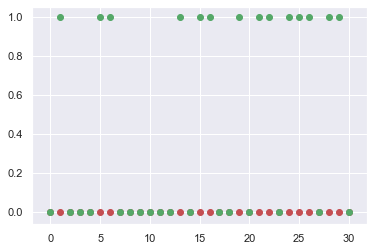

In [12]:
plt.scatter(range(31),res,c="r")
plt.scatter(range(31),y_val,c="g")
plt.show()

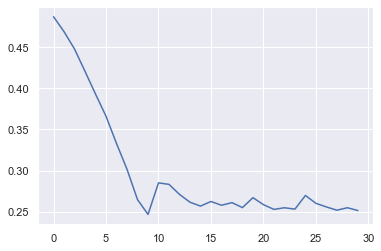

In [13]:
plt.plot(history.history['loss'])
plt.show()

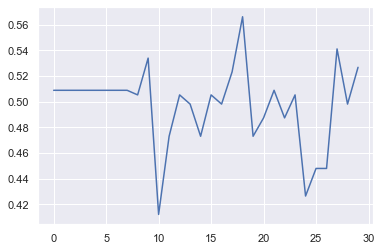

In [14]:
plt.plot(history.history['accuracy'])
plt.show()

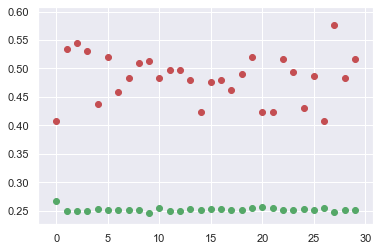

In [23]:
plt.scatter(range(30),history.history['accuracy'],c="r")
plt.scatter(range(30),history.history['loss'],c="g")
plt.show()

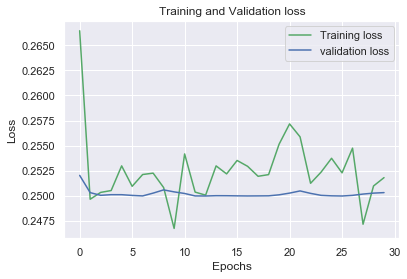

In [34]:
t_loss = history.history['loss']
v_loss = history.history['val_loss']
epochs = range(0,30)
plt.plot(epochs, t_loss, 'g', label='Training loss')
plt.plot(epochs, v_loss, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()